In [1]:
import GPy
import numpy as np
import matplotlib.pyplot as plt


warning in stationary: failed to import cython module: falling back to numpy
warning in coregionalize: failed to import cython module: falling back to numpy
warning in choleskies: failed to import cython module: falling back to numpy


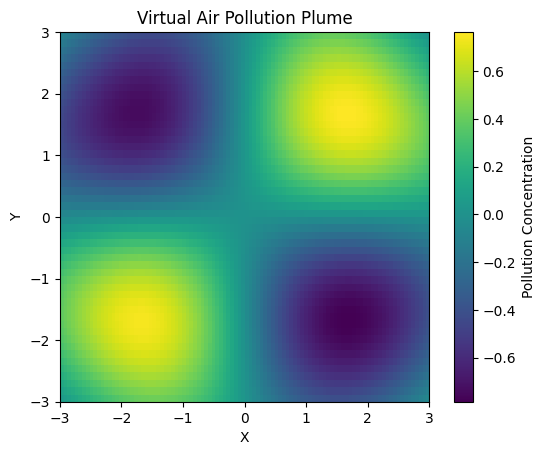

In [44]:
def sparse_GP_regression_2D(
    num_samples=400, num_inducing=50, max_iters=100, optimize=True, plot=True, nan=False
):
    """Run a 2D example of a sparse GP regression."""
    np.random.seed(1234)
    X = np.random.uniform(-3.0, 3.0, (num_samples, 2))
    Y = np.sin(X[:, 0:1]) * np.sin(X[:, 1:2]) + np.random.randn(num_samples, 1) * 0.05
    if nan:
        inan = np.random.binomial(1, 0.2, size=Y.shape)
        Y[inan] = np.nan

    # construct kernel
    rbf = GPy.kern.RBF(2)

    # create simple GP Model
    m = GPy.models.SparseGPRegression(X, Y, kernel=rbf, num_inducing=num_inducing)

    # contrain all parameters to be positive (but not inducing inputs)
    m[".*len"] = 2.0

    m.checkgrad()

    # optimize
    if optimize:
        m.optimize("tnc", messages=1, max_iters=max_iters)

    return m

model = sparse_GP_regression_2D(plot=False, optimize=False)

x_min, x_max = -3.0, 3.0  # Adjust to your desired range
y_min, y_max = -3.0, 3.0 
x_values = np.linspace(x_min, x_max, 50)  # 50 points in the x direction
y_values = np.linspace(y_min, y_max, 100) # 100 points in the y direction
X_new = np.array(np.meshgrid(x_values, y_values)).T.reshape(-1, 2) 

Y_new, Y_var = model.predict(X_new)  

plt.imshow(Y_new.reshape(50, 100), extent=[x_min, x_max, y_min, y_max], origin='lower')
plt.colorbar(label='Pollution Concentration')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Virtual Air Pollution Plume')
plt.show()
